In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib

from utils.DataAnalysis import TableAnalysis, MyCustomException
from utils.VariableAnalysis import UnivariateAnalysis,BivariateAnalysis

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Helper Functions

In [2]:
os.getcwd()

'd:\\ML_NOTE\\Complete_Data_Analysis\\DA_Class_Template'

In [3]:
file_path = pathlib.Path('D:\Capstone Project\dataset\House_Price_dataset')

In [4]:
df = pd.read_csv(f"{file_path}/gurgaon_properties_cleaned_v2.csv")
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [5]:
df.shape

(3803, 23)

In [6]:
## Parent Class Test
da_analysis = TableAnalysis(df)
print(da_analysis)

Rows: 3803
Columns: 23
Duplicates: 126
For Duplicate Records: ShowDuplicates()


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
## Parent Class Test
da_analysis = TableAnalysis(df)
print(da_analysis)

Rows: 3677
Columns: 23


In [9]:
da_analysis.CategoricalFeatureSummary()

,field,non_null_count,null_count,null%,dtype,unique_count,top_value,top_count,top_pct,top_3,top_3_pct,rare(<1%)_count,singleton_count,entropy,dominance_ratio,is_binary,high_cardinality
0,property_type,3677,0,0.0000,object,2,flat,2818,76.64,"[flat, house]","[76.64, 23.36]",0,0,0.5436,0.7664,True,False
1,society,3676,1,0.0272,object,677,independent,486,13.22,"[independent, tulip violet, ss the leaf]","[13.22, 2.04, 1.99]",672,309,5.4376,0.1322,False,True
2,sector,3677,0,0.0000,object,104,sohna road,166,4.51,"[sohna road, sector 85, sector 102]","[4.51, 2.94, 2.91]",62,0,4.3422,0.0451,False,True
3,areaWithType,3677,0,0.0000,object,2355,Plot area 360(301.01 sq.m.),37,1.01,"[Plot area 360(301.01 sq.m.), Plot area 300(25...","[1.01, 0.71, 0.52]",2354,1849,7.4545,0.0101,False,True
4,balcony,3677,0,0.0000,object,5,3+,1172,31.87,"[3+, 3, 2]","[31.87, 29.21, 24.04]",0,0,1.4447,0.3187,False,False
5,facing,2632,1045,28.4199,object,9,NaN,1045,28.42,"[nan, North-East, East]","[28.42, 16.94, 16.94]",0,0,1.9831,0.2842,False,False
6,agePossession,3677,0,0.0000,object,6,Relatively New,1646,44.76,"[Relatively New, New Property, Moderately Old]","[44.76, 16.13, 15.31]",0,0,1.5440,0.4476,False,False


In [10]:
da_analysis.NumericalFeatureSummary()

,field,non_null_count,null_count,null%,dtype,min,max,mean,median,std,var (M),1 %,5 %,25 %,50 %,75 %,95 %,99 %,IQR,lower_bound,upper_bound,outliers_count,outlier_percentage,skewness,kurtosis,distribution_summary
0,price,3660,17,0.4623,float64,0.07,31.5,2.53,1.52,2.98,0.00,0.25,0.37,0.95,1.52,2.75,8.5,15.26,1.80,-1.750,5.450,425,11.61,3.28,14.93,"Highly Skewed (Positive: tail on the right), V..."
1,price_per_sqft,3660,17,0.4623,float64,4.00,600000.0,13892.67,9020.00,23210.07,538.71,3299.16,4715.95,6817.25,9020.00,13880.50,33333.0,85052.47,7063.25,-3777.625,24475.375,354,9.67,11.44,186.93,"Highly Skewed (Positive: tail on the right), V..."
2,area,3660,17,0.4623,float64,50.00,875000.0,2888.33,1733.00,23167.51,536.73,250.00,518.85,1232.25,1733.00,2300.00,4246.2,8068.80,1067.75,-369.375,3901.625,216,5.90,29.73,942.03,"Highly Skewed (Positive: tail on the right), V..."
3,bedRoom,3677,0,0.0000,int64,1.00,21.0,3.36,3.00,1.90,0.00,1.00,2.00,2.00,3.00,4.00,6.0,12.00,2.00,-1.000,7.000,143,3.89,3.49,18.21,"Highly Skewed (Positive: tail on the right), V..."
4,bathroom,3677,0,0.0000,int64,1.00,21.0,3.42,3.00,1.95,0.00,1.00,2.00,2.00,3.00,4.00,6.0,12.00,2.00,-1.000,7.000,126,3.43,3.25,17.54,"Highly Skewed (Positive: tail on the right), V..."
5,floorNum,3658,19,0.5167,float64,0.00,51.0,6.80,5.00,6.01,0.00,0.00,1.00,2.00,5.00,10.00,18.0,27.00,8.00,-10.000,22.000,81,2.21,1.69,4.52,"Highly Skewed (Positive: tail on the right), L..."
6,super_built_up_area,1875,1802,49.0073,float64,89.00,10000.0,1925.24,1828.00,764.17,0.58,520.36,767.00,1479.50,1828.00,2215.00,3185.0,4636.68,735.50,376.250,3318.250,89,4.75,1.84,10.35,"Highly Skewed (Positive: tail on the right), V..."
7,built_up_area,1690,1987,54.0386,float64,2.00,737147.0,2379.59,1650.00,17942.88,321.95,61.89,240.45,1100.00,1650.00,2400.00,4691.0,7455.50,1300.00,-850.000,4350.000,127,7.51,40.71,1667.87,"Highly Skewed (Positive: tail on the right), V..."
8,carpet_area,1872,1805,49.0889,float64,15.00,607936.0,2529.18,1300.00,22799.84,519.83,92.31,350.00,843.00,1300.00,1790.00,2950.0,6859.50,947.00,-577.500,3210.500,78,4.17,24.33,604.54,"Highly Skewed (Positive: tail on the right), V..."
9,study room,3677,0,0.0000,int64,0.00,1.0,0.19,0.00,0.39,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.00,0.00,0.000,0.000,705,19.17,1.57,0.46,"Highly Skewed (Positive: tail on the right), M..."


# --------------- 1. Univariate Analysis Categorical Column ------------------

In [11]:
## Class Instantiation 
df_uni = UnivariateAnalysis(df) 
print(df_uni)

categorical_columns= ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']
numerical_columns= ['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'floorNum', 'super_built_up_area', 'built_up_area', 'carpet_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


#### Property Type Column Deep Analysis

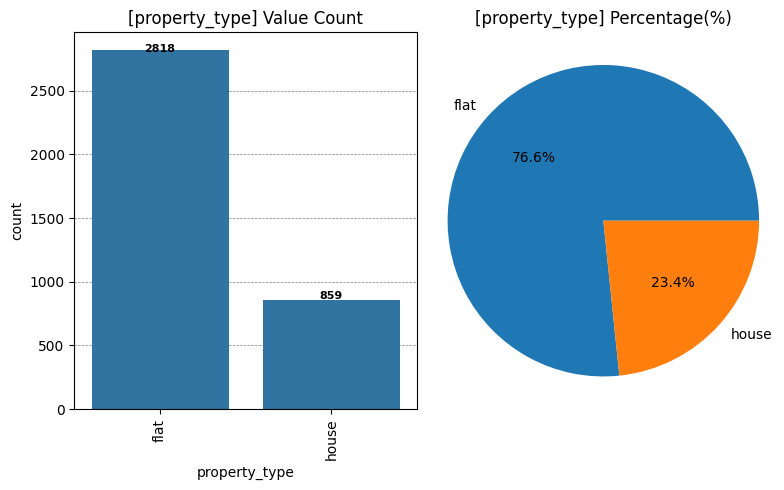

In [12]:
#### Categorical Column Analysis
# for each in ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']:
#     df_uni.CategoricalFeaturesAnalysis(each)


df_uni = UnivariateAnalysis(df) 
property_type_observation = df_uni.CategoricalFeaturesAnalysis('property_type')

In [13]:
property_type_observation

,field,property_type
0,non_null_count,3677
1,null_count,0
2,null%,0.0
3,dtype,object
4,unique_count,2
5,top_value,flat
6,top_count,2818
7,top_pct,76.64
8,top_3,"[flat, house]"
9,top_3_pct,"[76.64, 23.36]"


#### Society Column Deep Analysis

[society] Has Higher Unique Values, Picked Top Higher Frequency Value


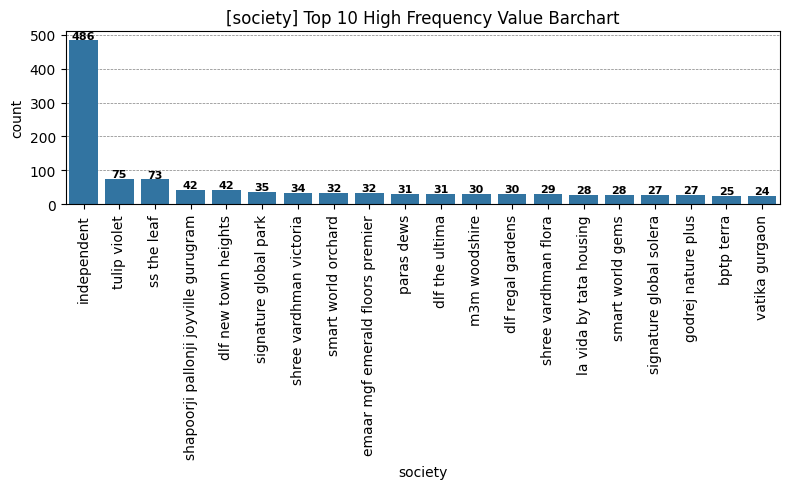

In [14]:
# #### Categorical Column Analysis
# for each in ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']:
#     df_uni.CategoricalFeaturesAnalysis(each)


df_uni = UnivariateAnalysis(df) 
society_observation = df_uni.CategoricalFeaturesAnalysis('society')

In [15]:
society_observation

,field,society
0,non_null_count,3676
1,null_count,1
2,null%,0.0272
3,dtype,object
4,unique_count,677
5,top_value,independent
6,top_count,486
7,top_pct,13.22
8,top_3,"[independent, tulip violet, ss the leaf]"
9,top_3_pct,"[13.22, 2.04, 1.99]"


In [16]:
df['society'].isnull().sum()
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,NaN,NaN,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,0,0


#### Sector Column Deep Analysis

[sector] Has Higher Unique Values, Picked Top Higher Frequency Value


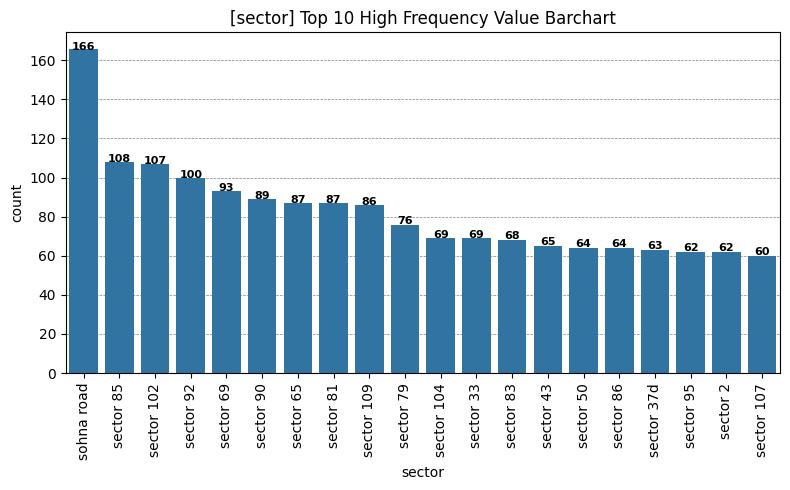

In [17]:
# #### Categorical Column Analysis
# for each in ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']:
#     df_uni.CategoricalFeaturesAnalysis(each)

df_uni = UnivariateAnalysis(df) 
sector_observation = df_uni.CategoricalFeaturesAnalysis('sector')

In [18]:
sector_observation

,field,sector
0,non_null_count,3677
1,null_count,0
2,null%,0.0
3,dtype,object
4,unique_count,104
5,top_value,sohna road
6,top_count,166
7,top_pct,4.51
8,top_3,"[sohna road, sector 85, sector 102]"
9,top_3_pct,"[4.51, 2.94, 2.91]"


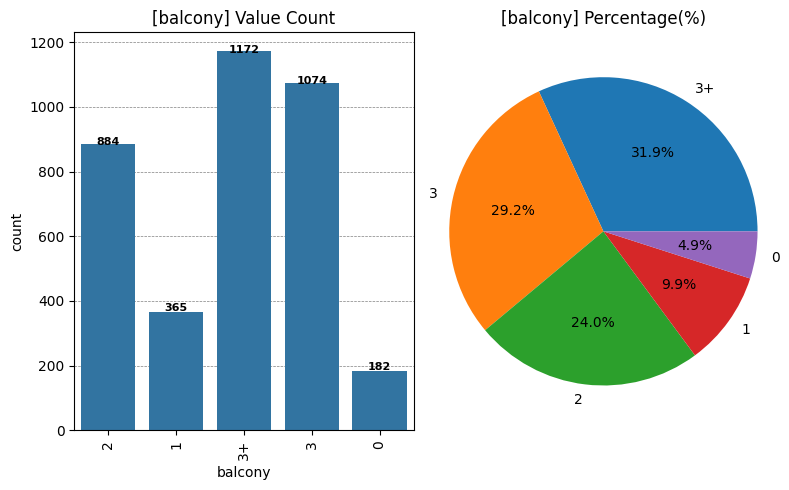

In [19]:
# #### Categorical Column Analysis
# for each in ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']:
#     df_uni.CategoricalFeaturesAnalysis(each)

df_uni = UnivariateAnalysis(df) 
balcony_observation = df_uni.CategoricalFeaturesAnalysis('balcony')

# ---------------2. Univariate Analysis Numerical Column -------------------

#### Price (Label Column) Column Deep Analysis 

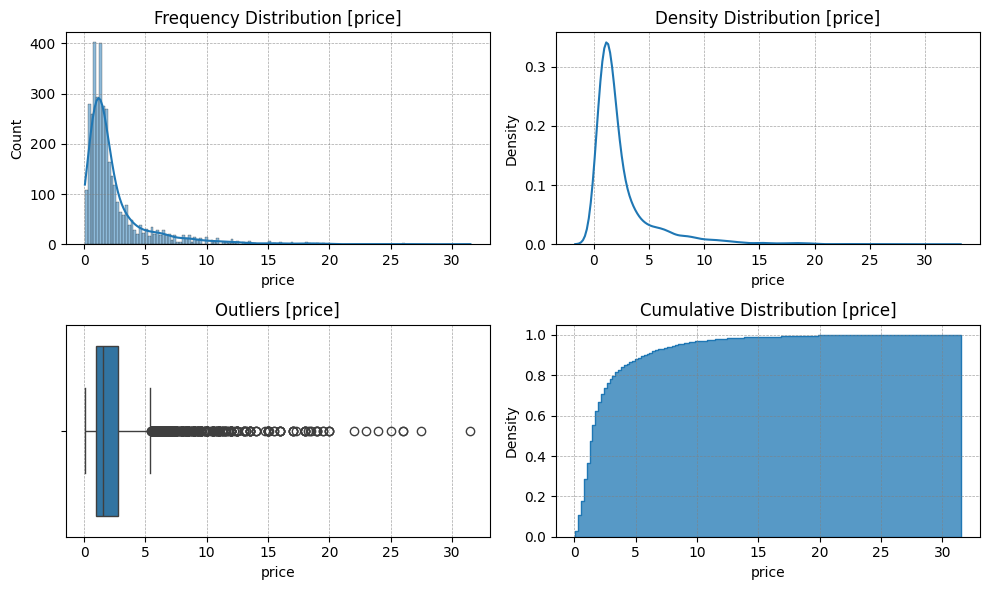

In [20]:
# numerical_columns= ['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'floorNum', 'super_built_up_area', 'built_up_area', 'carpet_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']
# for each in numerical_columns:
#     df_uni.NumericalFeatureAnalysis(each)

price_observation = df_uni.NumericalFeatureAnalysis('price')

In [21]:
price_observation

,field,price
0,non_null_count,3660
1,null_count,17
2,null%,0.4623
3,dtype,float64
4,min,0.07
5,max,31.5
6,mean,2.53
7,median,1.52
8,std,2.98
9,var (M),0.0


### Since Our Output Data is highly Skewed, Log Transformation Experiment for Normal distribution 


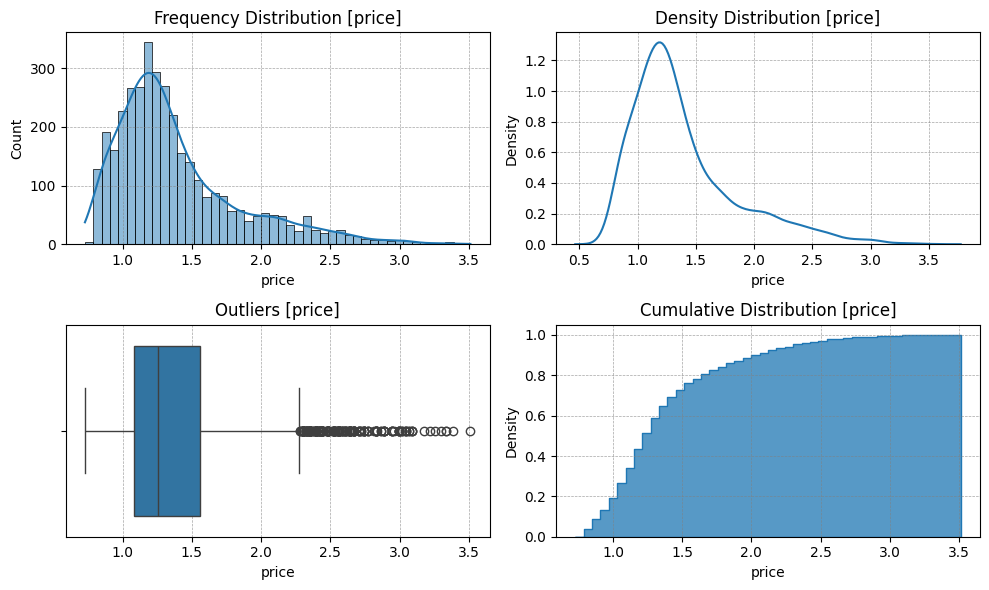

In [22]:
log_transfored_df = df.copy()
log_transfored_df['price'] = np.log1p(log_transfored_df['price'] + 1)
log_transfored_df =  UnivariateAnalysis(log_transfored_df)
log_transfored_Observation  = log_transfored_df.NumericalFeatureAnalysis('price')

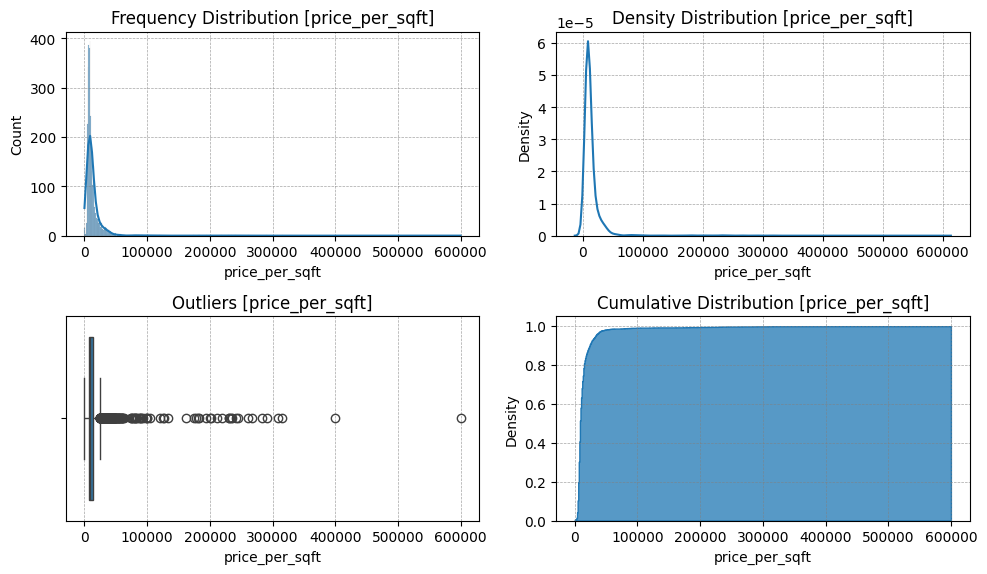

In [23]:
# numerical_columns= ['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'floorNum', 'super_built_up_area', 'built_up_area', 'carpet_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']
# for each in numerical_columns:
#     df_uni.NumericalFeatureAnalysis(each)

price_per_sqft_observation = df_uni.NumericalFeatureAnalysis('price_per_sqft')

In [24]:
price_per_sqft_observation

,field,price_per_sqft
0,non_null_count,3660
1,null_count,17
2,null%,0.4623
3,dtype,float64
4,min,4.0
5,max,600000.0
6,mean,13892.67
7,median,9020.0
8,std,23210.07
9,var (M),538.71


Considered Descrete - Low Cardinality: bedRoom


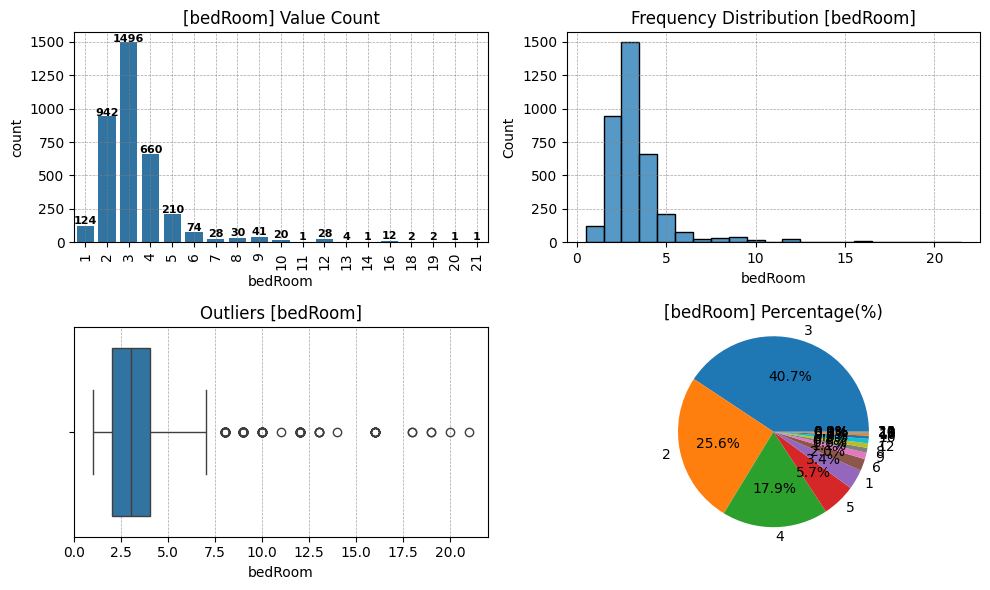

In [25]:
# numerical_columns= ['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'floorNum', 'super_built_up_area', 'built_up_area', 'carpet_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']
# for each in numerical_columns:
#     df_uni.NumericalFeatureAnalysis(each)

bedRoom_observation = df_uni.NumericalFeatureAnalysis('bedRoom')

In [26]:
bedRoom_observation

,field,bedRoom
0,non_null_count,3677
1,null_count,0
2,null%,0.0
3,dtype,int64
4,min,1.0
5,max,21.0
6,mean,3.36
7,median,3.0
8,std,1.9
9,var (M),0.0


# *****************************************************************************************************************************************

# 3. Bivariate Analysis 

In [27]:

# ### Bivariate Analysis Class
# class BivariateAnalysis(TableAnalysis): # Inherits functionality from the TableAnalysis class for univariate exploration
#     def __init__(self,dataframe):
#         super().__init__(dataframe)  # Initialize the parent DataAnalysis class with the dataframe
#         self.dataframe = dataframe
#         self.columns = list[self.dataframe.columns]
#         self.numeical_cols = list(self.dataframe.select_dtypes(include=(int,float)).columns) ## Numerical Column 
#         self.categorical_cols = list(self.dataframe.select_dtypes(include=(object)).columns) ## Categorical Column 

#     def __str__(self):
#         return f"categorical_columns= {self.categorical_cols}\nnumerical_columns= {self.numeical_cols}"

#     def CatgoricalNumericalBivar(self, cat_col, num_col, hue=None, estimator='median', figsize=(18,4)):
#         """Categorical and Numerical Bivariate Analysis"""
#         try:
#             if cat_col not in self.categorical_cols:
#                 raise MyCustomException (f"[{cat_col}] Not Present In Data Frame")
#             elif num_col not in self.numeical_cols:
#                 raise MyCustomException(f"[{num_col}] Not Present In Data Frame")
#             else:
#                 estimator_func = {
#                                 'mean': np.mean,'median': np.median,'sum': np.sum,'std': np.std,'min': np.min,'max': np.max,
#                                  }.get(estimator) 
#                 fig,ax = plt.subplots(1,3, figsize= figsize) ## Bar Plot
#                 sns.barplot(x=cat_col,y=num_col, data=self.dataframe, hue=hue, estimator=estimator_func, ax=ax[0]) ## Bar Plot
#                 ax[0].set_title(f"Bar Plot [{estimator} of '{num_col}' grouped by '{cat_col}']")

#                 sns.boxplot(x=self.dataframe[cat_col], y=self.dataframe[num_col], ax=ax[1]) ## Box Plot
#                 ax[1].set_title(f"Box plot ['{num_col}' across '{cat_col}']")

#                 # KDE Plot (one KDE per category)
#                 for category in self.dataframe[cat_col].dropna().unique():
#                     subset = self.dataframe[self.dataframe[cat_col] == category]
#                     sns.kdeplot(subset[num_col], label=str(category), ax=ax[2])

#                 ax[2].legend(title=cat_col)
#                 ax[2].set_title(f"KDE Plot ['{num_col}' by '{cat_col}']")

#                 plt.tight_layout()
#                 plt.show()
#         except MyCustomException as e:
#             pass

#     def CatgoricalBivar(self, cat_col1, cat_col2, hue=None, estimator='median', figsize=(18,4)):
#         """Categorical Bivariate Analysis"""
#         try:
#             if cat_col1 not in self.categorical_cols:
#                 raise MyCustomException (f"[{cat_col1}] Not Present In Data Frame")
#             elif cat_col2 not in self.categorical_cols:
#                 raise MyCustomException(f"[{cat_col2}] Not Present In Data Frame")
#             else:
#                 fig,ax = plt.subplots(1,2, figsize= figsize)
#                 sns.countplot(data=self.dataframe, x=cat_col1, hue=cat_col2,ax=ax[0]) ## Count Plot
#                 ax[0].set_title(f"Count Distribution '{cat_col1}' Across '{cat_col2}' Counts")

#                 crosstab = pd.crosstab(df['property_type'], df['agePossession'])
#                 sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', ax=ax[1]) ## Heat Map
#                 ax[1].set_title(f"Heatmap: ['{cat_col1}' vs '{cat_col2}']")
#                 plt.show()
#         except MyCustomException as e:
#             pass


categorical_columns= ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']
numerical_columns= ['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'floorNum', 'super_built_up_area', 'built_up_area', 'carpet_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


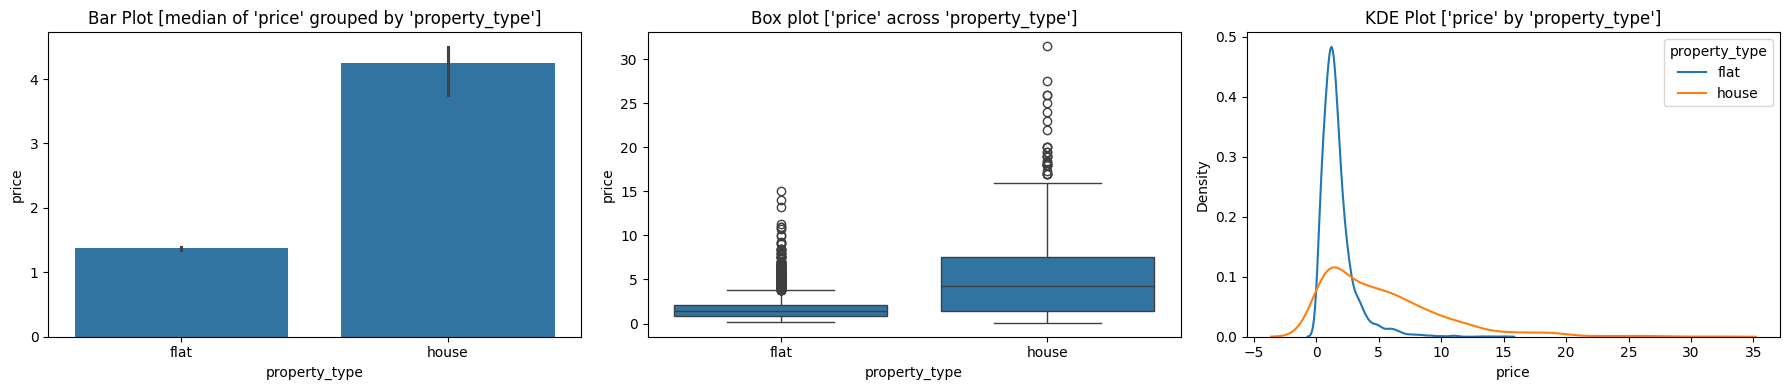

In [28]:
bi_df = BivariateAnalysis(df)
print(bi_df)
bi_df.CatgoricalNumericalBivar(cat_col ='property_type', num_col='price')

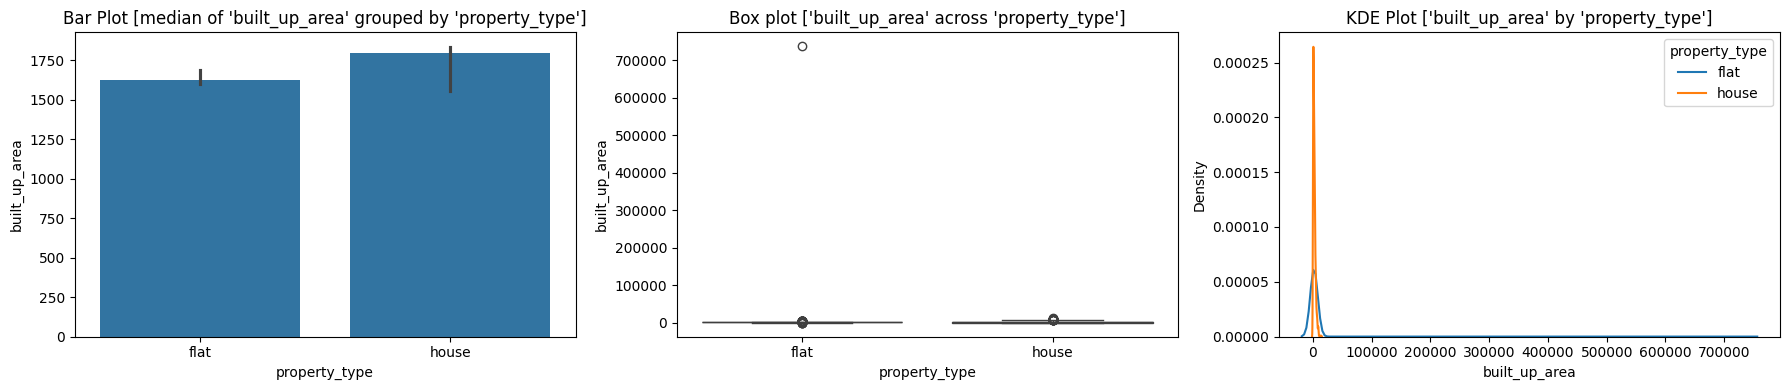

In [29]:
bi_df.CatgoricalNumericalBivar(cat_col ='property_type', num_col='built_up_area')

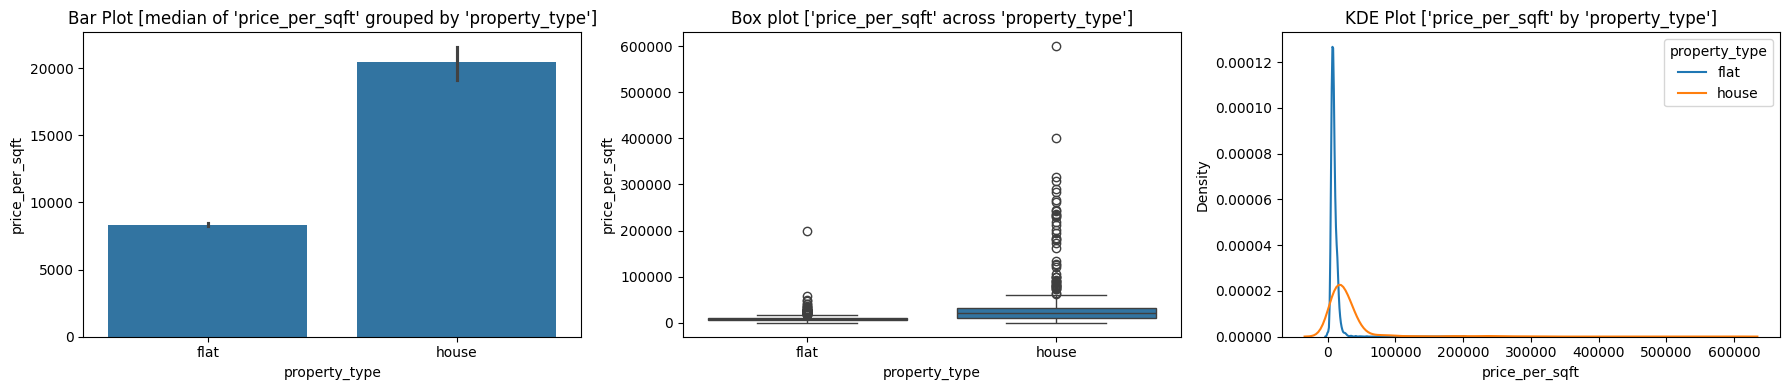

In [30]:
bi_df.CatgoricalNumericalBivar(cat_col ='property_type', num_col='price_per_sqft')


In [31]:
df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]


,property_type,society,sector,price,price_per_sqft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
229,house,rk excelo,sector 12,0.60,120000.0,50.0,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...,NaN,30.0,15.0
336,house,independent,sector 28,4.50,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),NaN,360.0,NaN
342,house,unitech nirvana birch court,sector 50,7.10,283333.0,251.0,Plot area 240(22.3 sq.m.),NaN,240.0,NaN
545,house,independent,sector 24,10.00,229885.0,435.0,Carpet area: 435 (40.41 sq.m.),NaN,NaN,435.0
867,house,ardee city,sector 52,5.50,183333.0,300.0,Plot area 300(27.87 sq.m.),NaN,300.0,NaN
975,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),NaN,232.0,NaN
1027,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),NaN,270.0,NaN
1062,house,independent,sector 23,2.80,161849.0,173.0,Plot area 173(16.07 sq.m.)Built Up area: 160 s...,NaN,160.0,150.0
1259,house,vipul tatvam villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),NaN,360.0,NaN
1385,house,unitech uniworld resorts,sector 33,9.50,173992.0,546.0,Plot area 546(50.73 sq.m.),NaN,546.0,NaN


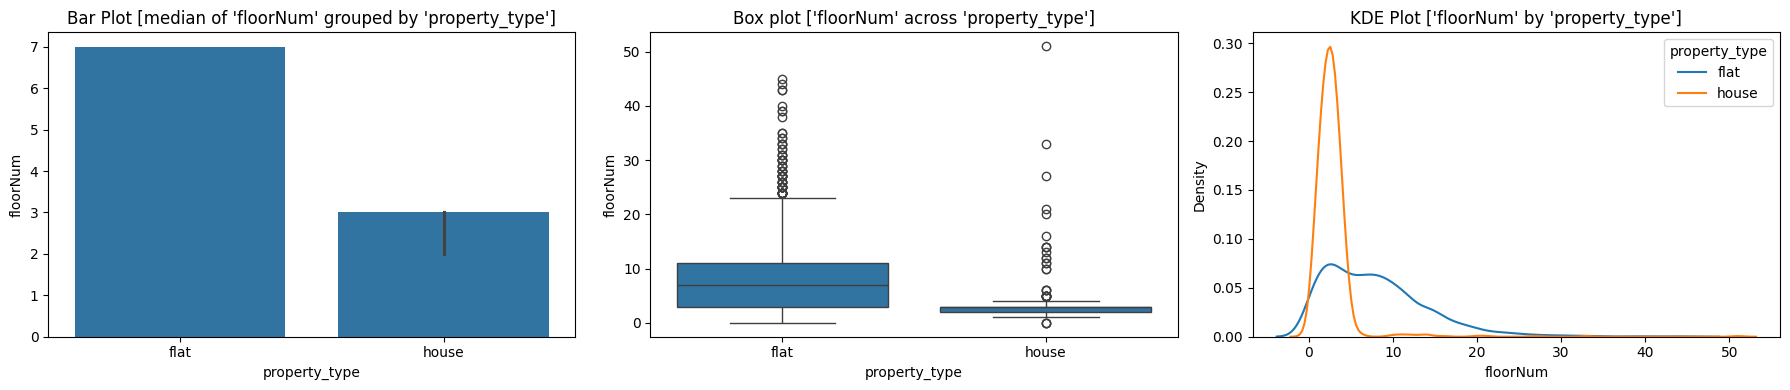

In [32]:
bi_df.CatgoricalNumericalBivar(cat_col ='property_type', num_col='floorNum')

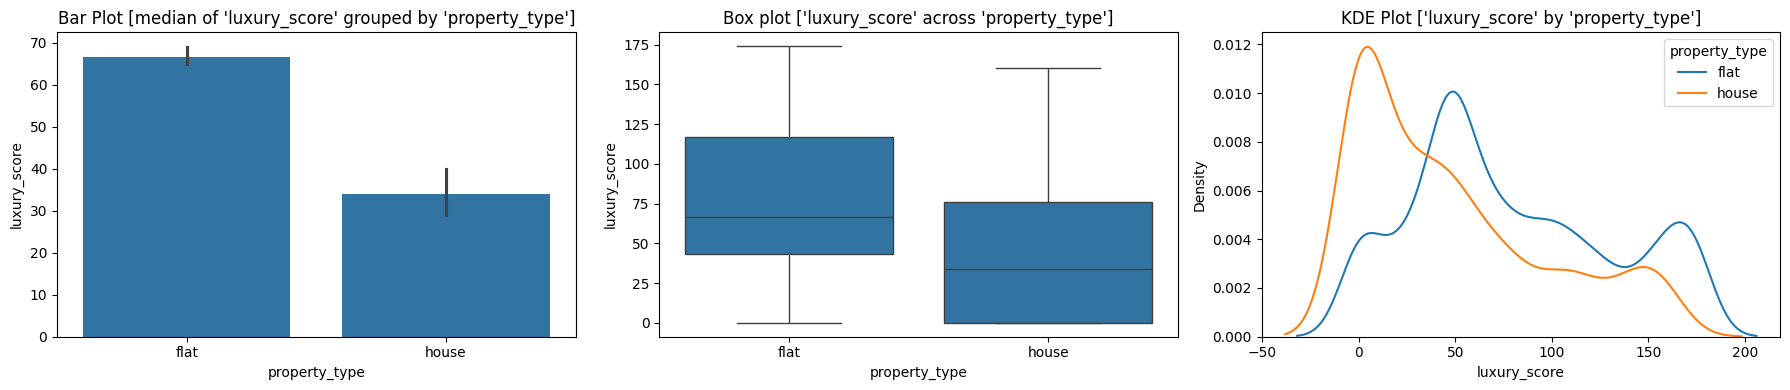

In [33]:
bi_df.CatgoricalNumericalBivar(cat_col ='property_type', num_col='luxury_score')

categorical_columns= ['property_type', 'society', 'sector', 'areaWithType', 'balcony', 'facing', 'agePossession']
numerical_columns= ['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'floorNum', 'super_built_up_area', 'built_up_area', 'carpet_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


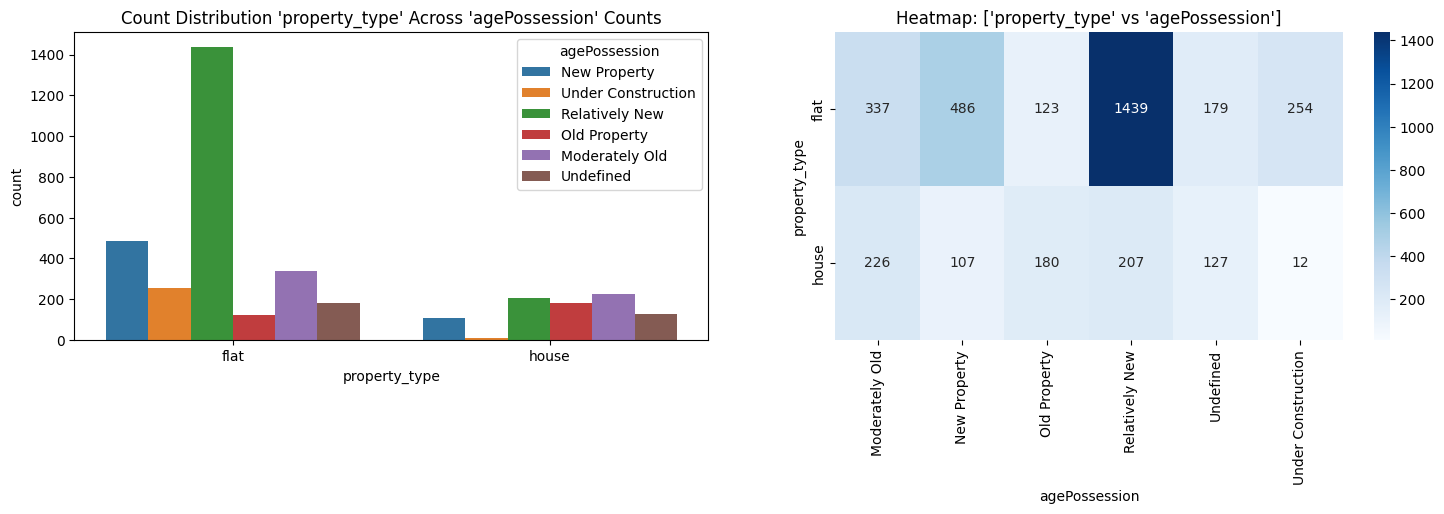

In [34]:
bi_df = BivariateAnalysis(df)
print(bi_df)
test = bi_df.CatgoricalBivar(cat_col1='property_type', cat_col2='agePossession')

In [35]:
# import dtale
# d = dtale.show(df)
# d.open_browser()

